# Data Description

The data has been split into two groups:


- training set (train.csv)

- test set (test.csv)
  
        
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

# Solution description

### 1. Data Handling-
   
   - Importing Data with Pandas
   - Cleaning Data
   - Exploring Data through Visualizations with Matplotlib
   - Feature Selection
   
### 2. Model Selection
   - Support Vector Classifier (SVC) with 2 kernels
   - Random Forest
   - Decision Tree
   - Naive Bayes
   - k-neighbors classifier


# Required Libraries:

   - NumPy
   - Pandas
   - SciKit-Learn
   - StatsModels
   - Matplotlib


In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#inpoting data
train_data = pd.read_csv('Data/train.csv')
X_test = pd.read_csv('Data/test.csv')
pid = X_test['PassengerId']
X_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Preparation

In [3]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train_data.shape

(891, 12)

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
X_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
y_train = train_data.loc[:,['Survived']]
X_train = train_data.drop('Survived', axis=1)

In [10]:
#Visualization of independent categorical attribute wrt dependent attribute
def bar_chart(i_attribute):
    survived = X_train[y_train['Survived'] == 1][i_attribute].value_counts()
    dead = X_train[y_train['Survived'] == 0][i_attribute].value_counts()
    data = pd.DataFrame([survived, dead], index=['Survived','dead'])
    data.plot(kind='bar', figsize=(10,5))
    plt.show()
    plt.close()


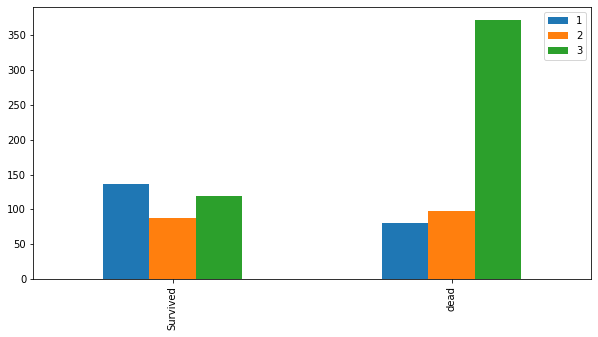

In [11]:
#Visualization of Pclass wrt Survived
bar_chart('Pclass')

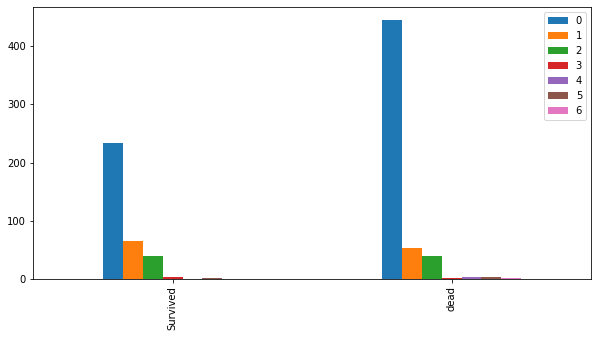

In [12]:
bar_chart('Parch')

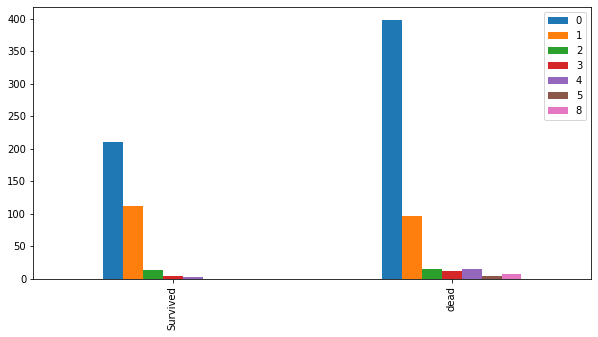

In [13]:
bar_chart('SibSp')

/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


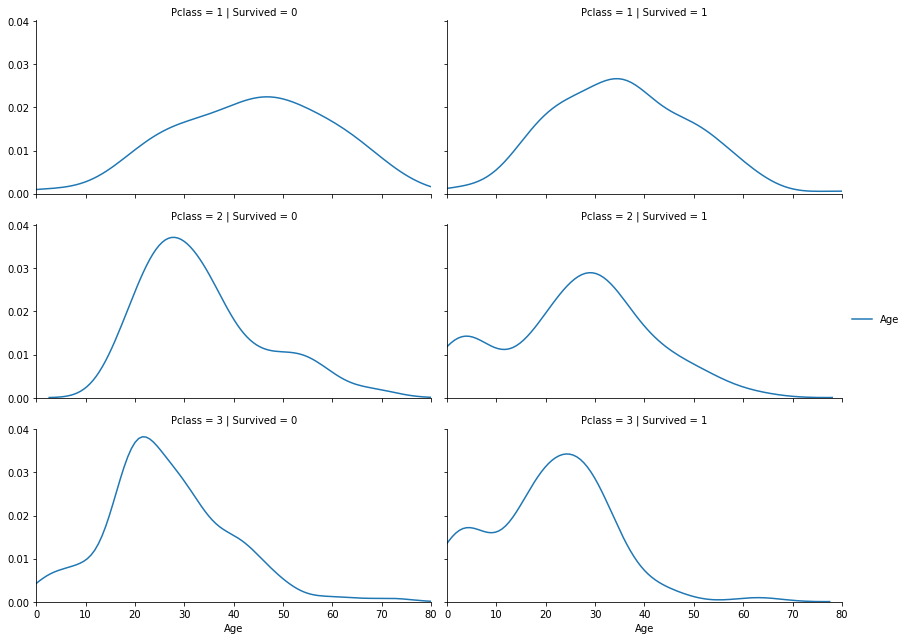

In [14]:
#visualizing age wrt pclass and survived
import seaborn as sns
grid = sns.FacetGrid(data=train_data, row='Pclass', col='Survived', aspect=2)
grid.map(sns.kdeplot, 'Age')
grid.set(xlim=(0, train_data['Age'].max()))
grid.add_legend()
plt.show()
plt.close()

## Dealing with NaN values

In [15]:
#Replaceing NaN value in Age with its mean
class1_0 = X_train[(X_train.Pclass == 1)&(y_train['Survived'] == 0)]['Age'].mean()
class1_1 = X_train[(X_train.Pclass == 1)&(y_train['Survived'] == 1)]['Age'].mean()
class2_0 = X_train[(X_train.Pclass == 2)&(y_train['Survived'] == 0)]['Age'].mean()
class2_1 = X_train[(X_train.Pclass == 2)&(y_train['Survived'] == 1)]['Age'].mean()
class3_0 = X_train[(X_train.Pclass == 3)&(y_train['Survived'] == 0)]['Age'].mean()
class3_1 = X_train[(X_train.Pclass == 3)&(y_train['Survived'] == 1)]['Age'].mean()

#for train data
null_values = X_train['Age'].isnull()
for i in range(0, len(X_train.index.tolist())):
    if null_values[i]:
        if (X_train.loc[i, 'Pclass'] == 1)&(y_train.loc[i, 'Survived'] == 0):
            X_train.loc[i, 'Age'] = class1_0 
        elif (X_train.loc[i, 'Pclass'] == 1)&(y_train.loc[i, 'Survived'] == 1):
            X_train.loc[i, 'Age'] = class1_1
        if (X_train.loc[i, 'Pclass'] == 2)&(y_train.loc[i, 'Survived'] == 0):
            X_train.loc[i, 'Age'] = class2_0 
        if (X_train.loc[i, 'Pclass'] == 2)&(y_train.loc[i, 'Survived'] == 1):
            X_train.loc[i, 'Age'] = class2_1
        if (X_train.loc[i, 'Pclass'] == 3)&(y_train.loc[i, 'Survived'] == 0):
            X_train.loc[i, 'Age'] = class3_0 
        if (X_train.loc[i, 'Pclass'] == 3)&(y_train.loc[i, 'Survived'] == 1):
            X_train.loc[i, 'Age'] = class3_1

#for test data
null_values = X_test['Age'].isnull()
for i in range(0, len(X_test.index.tolist())):
    if null_values[i]:
        if (X_test.loc[i, 'Pclass'] == 1):
            X_test.loc[i, 'Age'] = (class1_0 + class1_1)/2
        if (X_test.loc[i, 'Pclass'] == 2):
            X_test.loc[i, 'Age'] = (class2_0 + class2_1)/2
        else:
            X_test.loc[i, 'Age'] = (class3_1 + class3_0)/2

X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
X_train['Cabin'].head(5)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [17]:
#Extracting the first letter from cabin 
X_train['Cabin'] = X_train['Cabin'].str[:1]
X_train[['Pclass','Cabin']].groupby('Pclass')['Cabin'].value_counts()


Pclass  Cabin
1       C        59
        B        47
        D        29
        E        25
        A        15
        T         1
2       F         8
        D         4
        E         4
3       F         5
        G         4
        E         3
Name: Cabin, dtype: int64

In [18]:
X_train[['Cabin','Age']].groupby('Cabin')['Age'].mean()

Cabin
A    44.605729
B    35.150287
C    36.412660
D    38.810194
E    37.649055
F    20.515513
G    14.750000
T    45.000000
Name: Age, dtype: float64

In [19]:
#Replacing NaN value in Cabin
              
null_index = X_train['Cabin'].isnull()

#for train data
for i in range(0, len(X_train.index.tolist())):
    if null_index[i]:
        if (X_train.loc[i, 'Pclass'] == 1)&(y_train.loc[i, 'Survived'] == 1):
            X_train.loc[i, 'Cabin'] = 'C'
        elif (X_train.loc[i, 'Pclass'] == 1)&(y_train.loc[i, 'Survived'] == 0):
            X_train.loc[i, 'Cabin'] = 'T'
        elif (X_train.loc[i, 'Pclass'] == 2)&(y_train.loc[i, 'Survived'] == 1):
            X_train.loc[i, 'Cabin'] = 'D'
        elif (X_train.loc[i, 'Pclass'] == 2)&(y_train.loc[i, 'Survived'] == 0):
            X_train.loc[i, 'Cabin'] = 'E'
        elif (X_train.loc[i, 'Pclass'] == 3)&(y_train.loc[i, 'Survived'] == 1):
            X_train.loc[i, 'Cabin'] = 'G'
        else:
            X_train.loc[i, 'Cabin'] = 'F'

null_index = X_test['Cabin'].isnull()
for i in range(0, len(X_test.index.tolist())):
    if null_index[i]:
        if (X_test.loc[i, 'Pclass'] == 1):
            X_test.loc[i, 'Cabin'] = 'C'
        elif (X_test.loc[i, 'Pclass'] == 2):
            X_test.loc[i, 'Cabin'] = 'D'
        else:
            X_test.loc[i, 'Cabin'] = 'F'
            
        
        
X_train['Cabin'].isnull().sum()

0

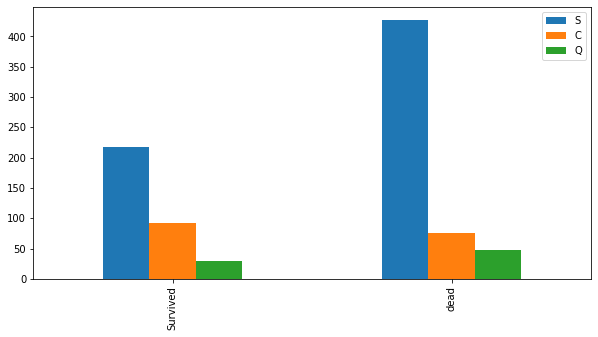

In [20]:
#Visualizing Embarked
bar_chart('Embarked')

In [21]:
X_train[['Pclass','Embarked']].groupby('Pclass')['Embarked'].value_counts()

Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

In [22]:
X_train['Embarked'] = X_train['Embarked'].fillna('S')
X_train['Embarked'].isnull().sum()

0

## Applying one hot encoding and label encoding to the attributes

In [23]:
#label encoding sex
value_set = {'male':0, 'female':1}
X_test['Sex'] = X_test['Sex'].map(value_set)
X_train['Sex'] = X_train['Sex'].map(value_set)

In [24]:
#label encoding Embarked
X_train = pd.concat([X_train, pd.get_dummies(X_train['Embarked'], drop_first=True)], axis=1).drop('Embarked', axis=1)

In [25]:
X_test = pd.concat([X_test, pd.get_dummies(X_test['Embarked'], drop_first=True)], axis=1).drop('Embarked', axis=1)
X_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Q                uint8
S                uint8
dtype: object

In [26]:
X_train['Cabin'].value_counts()

F    379
E    126
G    117
D    107
C     78
B     47
T     22
A     15
Name: Cabin, dtype: int64

In [27]:
values_dist = {'F':0, 'E':1, 'G':2, 'D':3, 'C':4, 'B':5, 'T':6, 'A':7}
X_train['Cabin'] = X_train['Cabin'].map(values_dist)
X_train['Cabin'].head()

0    0
1    4
2    2
3    4
4    0
Name: Cabin, dtype: int64

In [28]:
X_test['Cabin'] = X_test['Cabin'].map(values_dist)

## Adding some new Attributes that may help in prediction

In [29]:
#Name may not help in prediction but the titles of name can be used
def adding_titles(X, substrings):
    name = X.split(" ")
    for substring in substrings:
        if substring in name:
            return substring

    return np.nan


def replace_titles(x):
    title = x['Title']

    if title in ['Mr.', 'Don.', 'Major.', 'Capt.', 'Jonkheer.', 'Rev.', 'Col.','Sir.','Master.']:
        return 'Mr'
    elif title in ['Mrs.','Countess.', 'Mme.','Lady.']:
        return 'Mrs'
    elif title in ['Miss.','Mlle.', 'Ms.','Dona.']:
        return 'Miss'
    elif title == 'Dr.':
        if x['Sex'] == 'Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title


In [30]:
#Extracting the title from name
title_list=['Mrs.', 'Mr.', 'Master.', 'Miss.', 'Major.', 'Rev.',
            'Dr.', 'Ms.', 'Mlle.','Col.', 'Capt.', 'Mme.', 'Countess.',
            'Don.', 'Jonkheer.','Sir.','Lady.','Dona.']

X_train['Title'] = X_train['Name'].map(lambda x: adding_titles(x, title_list))
#replacing the different titles with mr, mrs and miss
X_train['Title'] = X_train.apply(replace_titles, axis=1)
X_train['Title'].value_counts()

Mr      571
Miss    185
Mrs     135
Name: Title, dtype: int64

In [31]:
X_test['Title'] = X_test['Name'].map(lambda x: adding_titles(x, title_list))
X_test['Title'] = X_test.apply(replace_titles, axis=1)
X_test['Title'].value_counts()

Mr      265
Miss     80
Mrs      73
Name: Title, dtype: int64

In [32]:
#encoding the title
values_count = {'Mr':0, 'Mrs':1, 'Miss':2}
X_train['Title'] = X_train['Title'].map(values_count)
X_test['Title'] = X_test['Title'].map(values_count)

In [33]:
#Creating new family_size column
X_train['Family_Size']= X_train['SibSp'] + X_train['Parch']
X_test['Family_Size']= X_test['SibSp'] + X_test['Parch']

In [34]:
#Fare pre person
X_train['Fare_Per_Person'] = X_train['Fare']/(X_train['Family_Size']+1)
X_test['Fare_Per_Person'] = X_test['Fare']/(X_test['Family_Size']+1)

In [35]:
#deleting some unwanted attributes
X_train.drop(['Name','Ticket'], axis=1, inplace=True)
X_test.drop(['Name','Ticket'], axis=1, inplace=True)

## Feature Selection

In [36]:
from statsmodels.api import OLS
from sklearn.preprocessing import StandardScaler


In [37]:
ols = OLS(endog=y_train, exog=X_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Survived   R-squared (uncentered):                   0.700
Model:                            OLS   Adj. R-squared (uncentered):              0.696
Method:                 Least Squares   F-statistic:                              171.0
Date:                Fri, 15 May 2020   Prob (F-statistic):                   2.97e-220
Time:                        22:40:46   Log-Likelihood:                         -301.09
No. Observations:                 891   AIC:                                      626.2
Df Residuals:                     879   BIC:                                      683.7
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
PassengerId       4.85e-05   4.34e-05      1.117      0.264   -3.67e-05       0.000
Pclass              0.0780      0.013      6.145      0.000       0.053       0.103
Sex                 0.6432      0.068      9.492      0.000       0.510       0.776
Age                -0.0071      0.001     -8.152      0.000      -0.009      -0.005
SibSp              -0.0092      0.011     -0.832      0.406      -0.031       0.012
Parch              -0.0127      0.013     -0.959      0.338      -0.039       0.013
Fare                0.0005      0.001      0.987      0.324      -0.001       0.002
Cabin               0.1496      0.008     18.602      0.000       0.134       0.165
Q                   0.0298      0.050      0.594      0.553      -0.069       0.128
S                   0.0123      0.030      0.412      0.680      -0.046       0.071
Title              -0.1340      0.040     -3.355      0.001      -0.212      -0.056
Family_Size        -0.0219      0.007     -3.343      0.001      -0.035      -0.009
Fare_Per_Person    -0.0003      0.001     -0.453      0.650      -0.002       0.001
==============================================================================
Omnibus:                       14.661   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.009
Skew:                           0.175   Prob(JB):                     4.52e-05
Kurtosis:                       3.645   Cond. No.                     1.03e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.24e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
#Deleting all the unwanted attribute
X_train.drop(['Parch','PassengerId','Fare','SibSp','Fare_Per_Person','Cabin'], axis=1, inplace=True)
X_test.drop(['Parch','PassengerId','Fare','SibSp','Fare_Per_Person','Cabin'], axis=1, inplace=True)

## Model Selection

we are going to use grid search for different models to find the best hyper parameters and best model

In [40]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train = std.fit_transform(X_train, y_train)
X_test = std.transform(X_test)

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Support Vector Classifier
params = {'C': [i for i in np.arange (0.1, 3, 0.1)], 'kernel':['rbf','linear']}

grid_search = GridSearchCV(SVC(), params, cv=5, return_train_score=False)
grid_search.fit(X_train, y_train)

/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6,
                               0.7000000000000001, 0.8, 0.9, 1.0, 1.1,
                               1.2000000000000002, 1.3000000000000003,
                               1.4000000000000001, 1.5000000000000002, 1.6,
                               1.7000000000000002, 1.8000000000000003,
                               1.9000000000000001, 2.0, 2.1, 2.2,
                               2.3000000000000003, 2.4000000000000004,
                               2.5000000000000004, 2.6, 2.7, 2.8000000000000003,
                               2.9000000000000004],
                         'kernel': ['rbf', 'linear']})

In [42]:
score = pd.DataFrame(grid_search.cv_results_)
score = score[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False)
score

,params,mean_test_score
48,"{'C': 2.5000000000000004, 'kernel': 'rbf'}",0.829427
46,"{'C': 2.4000000000000004, 'kernel': 'rbf'}",0.829427
40,"{'C': 2.1, 'kernel': 'rbf'}",0.828310
42,"{'C': 2.2, 'kernel': 'rbf'}",0.828310
50,"{'C': 2.6, 'kernel': 'rbf'}",0.828310
52,"{'C': 2.7, 'kernel': 'rbf'}",0.828310
44,"{'C': 2.3000000000000003, 'kernel': 'rbf'}",0.828310
36,"{'C': 1.9000000000000001, 'kernel': 'rbf'}",0.827186
38,"{'C': 2.0, 'kernel': 'rbf'}",0.826062
54,"{'C': 2.8000000000000003, 'kernel': 'rbf'}",0.824945


In [43]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

grid_search = GridSearchCV(RandomForestClassifier(random_state=15325), 
                           {'n_estimators': [i for i in range(100,800,100)]},
                           cv=5,
                           return_train_score=False
                          )
grid_search.fit(X_train, y_train)

/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_s

/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_s

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=15325),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700]})

In [44]:
score = pd.DataFrame(grid_search.cv_results_)
score = score[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False)
score

,params,mean_test_score
0,{'n_estimators': 100},0.817118
2,{'n_estimators': 300},0.816000
5,{'n_estimators': 600},0.816000
6,{'n_estimators': 700},0.816000
3,{'n_estimators': 400},0.814883
4,{'n_estimators': 500},0.814883
1,{'n_estimators': 200},0.814870


In [45]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

grid_search = GridSearchCV(DecisionTreeClassifier(), 
                           {'criterion': ['gini','entropy']},
                           cv=5,
                           return_train_score=False
                          )
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})

In [46]:
score = pd.DataFrame(grid_search.cv_results_)
score = score[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False)
score

,params,mean_test_score
0,{'criterion': 'gini'},0.826081
1,{'criterion': 'entropy'},0.814858


In [47]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
grid_search = GridSearchCV(GaussianNB(), 
                           {},
                           cv=5,
                           return_train_score=False
                          )
grid_search.fit(X_train, y_train)

/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

GridSearchCV(cv=5, estimator=GaussianNB(), param_grid={})

In [48]:
score = pd.DataFrame(grid_search.cv_results_)
score = score[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False)
score

,params,mean_test_score
0,{},0.792373


In [50]:
#k-neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

grid_search = GridSearchCV(KNeighborsClassifier(), 
                           {'n_neighbors':[i for i in range(1,14)]},
                           cv=5,
                           return_train_score=False
                          )
grid_search.fit(X_train, y_train)


/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/mode

/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/mode

/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/gaurav/snap/jupyter/common/lib/python3.7/site-packages/sklearn/mode

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13]})

In [51]:
score = pd.DataFrame(grid_search.cv_results_)
score = score[['params','mean_test_score']].sort_values(by='mean_test_score', ascending=False)
score

,params,mean_test_score
8,{'n_neighbors': 9},0.822666
7,{'n_neighbors': 8},0.821549
12,{'n_neighbors': 13},0.820432
9,{'n_neighbors': 10},0.820419
5,{'n_neighbors': 6},0.819321
10,{'n_neighbors': 11},0.818191
4,{'n_neighbors': 5},0.817080
2,{'n_neighbors': 3},0.817074
6,{'n_neighbors': 7},0.815944
11,{'n_neighbors': 12},0.815937


#### The best model for our data is Support Vector Classifier (SVC) with accuracy of 0.829427
#### Results as scored by Kaggle: RMSE = 0.78468